<a href="https://colab.research.google.com/github/ballmdr/Machine-Learning/blob/master/Logistic_Regression_Softmax_Pure_numpy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

x_train:  (1050, 2)
y_train:  (1050, 3)


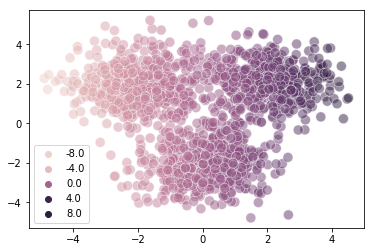

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set
%matplotlib inline
import pandas as pd
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

N = 500

X1 = np.random.randn(N, 2) + np.array([0, -2])
X2 = np.random.randn(N, 2) + np.array([2, 2])
X3 = np.random.randn(N, 2) + np.array([-2, 2])
X = np.vstack([X1, X2, X3])

Y = np.array([0]*N + [1]*N + [2]*N)

zero = np.zeros((Y.shape[0], 3))
for i in range(Y.shape[0]):
  zero[i, Y[i]] = 1

Y = zero
  
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=42)

print('x_train: ', x_train.shape)
print('y_train: ', y_train.shape)


# let's see what it looks like
sns.scatterplot(X[:,0], X[:,1], hue=X[:,0], s=100, alpha=0.5)
plt.show()

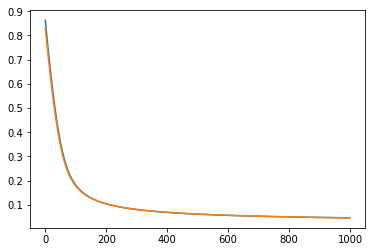

0.9666666666666667


In [68]:
def softmax(a):
  a = np.exp(a)
  return a / a.sum(axis=1, keepdims=True)

def cross_entropy(t, y):
  return - np.mean((t * np.log(y)))

def predict(y):
  return np.argmax(y, axis=1)

def model_score(t, y):
  return np.mean(t == y)

b = np.random.randn(3)
w = np.random.randn(X.shape[1], 3)


lr = 0.00001
epochs = 1000
train_costs = []
test_costs = []

for i in range(epochs):
  y_pred_train = softmax(x_train.dot(w) + b)
  cost = cross_entropy(y_train, y_pred_train)
  train_costs.append(cost)
  
  y_pred_test = softmax(x_test.dot(w) + b)
  cost = cross_entropy(y_test, y_pred_test)
  test_costs.append(cost)
  
  w += x_train.T.dot(y_train - y_pred_train) * lr
  b += (y_train - y_pred_train).sum(axis=0) * lr
  
plt.plot(train_costs)
plt.plot(test_costs)
plt.show()


print(model_score(predict(y_test), predict(y_pred_test)))
  